In [1]:
!pip install mxnet-cu100

In [0]:
import mxnet as mx
from mxnet import nd, autograd
import matplotlib.pyplot as plt

ctx = mx.gpu()

##Reading the data from text file

In [3]:
with open('text.txt') as file:
    text = file.read()

print(text)

Artificial intelligence (AI) is the simulation of human intelligence processes by machines, especially computer systems. These processes include learning (the acquisition of information and rules for using the information), reasoning (using rules to reach approximate or definite conclusions) and self-correction.
Particular applications of AI include expert systems, speech recognition and machine vision. Artificial intelligence (AI), the ability of a digital computer or computer-controlled robot to perform tasks commonly associated with intelligent beings. The term is frequently applied to the project of developing systems endowed with the intellectual processes characteristic of humans, such as the ability to reason, discover meaning, generalize, or learn from past experience. Since the development of the digital computer in the 1940s, it has been demonstrated that computers can be programmed to carry out very complex tasks—as, for example, discovering proofs for mathematical theorems 

In [4]:
characters = list(set(text))
vocab_length = len(characters)
print(characters)
print(f'Number of unique characters: {vocab_length}')

['s', 'a', 'm', 'C', 'I', 'N', '0', '“', '—', '4', 'l', 'T', ';', 'g', 'z', 'U', 'G', 'p', ':', 'x', 'A', 'c', ' ', '-', 'S', ')', 't', 'b', 'r', 'd', '9', '?', 'K', 'L', 'n', 'M', 'H', 'B', 'v', 'h', 'O', '1', 'W', "'", 'R', 'o', 'k', '”', 'E', 'j', 'V', ',', '.', '(', '\n', 'F', 'i', 'é', 'P', 'u', 'q', 'w', 'f', '’', 'D', 'y', 'e']
Number of unique characters: 67


In [5]:
char_to_int = dict([(char, i) for i, char in enumerate(characters)])
char_to_int

{'\n': 54,
 ' ': 22,
 "'": 43,
 '(': 53,
 ')': 25,
 ',': 51,
 '-': 23,
 '.': 52,
 '0': 6,
 '1': 41,
 '4': 9,
 '9': 30,
 ':': 18,
 ';': 12,
 '?': 31,
 'A': 20,
 'B': 37,
 'C': 3,
 'D': 64,
 'E': 48,
 'F': 55,
 'G': 16,
 'H': 36,
 'I': 4,
 'K': 32,
 'L': 33,
 'M': 35,
 'N': 5,
 'O': 40,
 'P': 58,
 'R': 44,
 'S': 24,
 'T': 11,
 'U': 15,
 'V': 50,
 'W': 42,
 'a': 1,
 'b': 27,
 'c': 21,
 'd': 29,
 'e': 66,
 'f': 62,
 'g': 13,
 'h': 39,
 'i': 56,
 'j': 49,
 'k': 46,
 'l': 10,
 'm': 2,
 'n': 34,
 'o': 45,
 'p': 17,
 'q': 60,
 'r': 28,
 's': 0,
 't': 26,
 'u': 59,
 'v': 38,
 'w': 61,
 'x': 19,
 'y': 65,
 'z': 14,
 'é': 57,
 '—': 8,
 '’': 63,
 '“': 7,
 '”': 47}

In [6]:
int_to_char = dict([(i, char) for i, char in enumerate(characters)])
int_to_char

{0: 's',
 1: 'a',
 2: 'm',
 3: 'C',
 4: 'I',
 5: 'N',
 6: '0',
 7: '“',
 8: '—',
 9: '4',
 10: 'l',
 11: 'T',
 12: ';',
 13: 'g',
 14: 'z',
 15: 'U',
 16: 'G',
 17: 'p',
 18: ':',
 19: 'x',
 20: 'A',
 21: 'c',
 22: ' ',
 23: '-',
 24: 'S',
 25: ')',
 26: 't',
 27: 'b',
 28: 'r',
 29: 'd',
 30: '9',
 31: '?',
 32: 'K',
 33: 'L',
 34: 'n',
 35: 'M',
 36: 'H',
 37: 'B',
 38: 'v',
 39: 'h',
 40: 'O',
 41: '1',
 42: 'W',
 43: "'",
 44: 'R',
 45: 'o',
 46: 'k',
 47: '”',
 48: 'E',
 49: 'j',
 50: 'V',
 51: ',',
 52: '.',
 53: '(',
 54: '\n',
 55: 'F',
 56: 'i',
 57: 'é',
 58: 'P',
 59: 'u',
 60: 'q',
 61: 'w',
 62: 'f',
 63: '’',
 64: 'D',
 65: 'y',
 66: 'e'}

In [7]:
int_text = [char_to_int[char] for char in text]
int_text

[20,
 28,
 26,
 56,
 62,
 56,
 21,
 56,
 1,
 10,
 22,
 56,
 34,
 26,
 66,
 10,
 10,
 56,
 13,
 66,
 34,
 21,
 66,
 22,
 53,
 20,
 4,
 25,
 22,
 56,
 0,
 22,
 26,
 39,
 66,
 22,
 0,
 56,
 2,
 59,
 10,
 1,
 26,
 56,
 45,
 34,
 22,
 45,
 62,
 22,
 39,
 59,
 2,
 1,
 34,
 22,
 56,
 34,
 26,
 66,
 10,
 10,
 56,
 13,
 66,
 34,
 21,
 66,
 22,
 17,
 28,
 45,
 21,
 66,
 0,
 0,
 66,
 0,
 22,
 27,
 65,
 22,
 2,
 1,
 21,
 39,
 56,
 34,
 66,
 0,
 51,
 22,
 66,
 0,
 17,
 66,
 21,
 56,
 1,
 10,
 10,
 65,
 22,
 21,
 45,
 2,
 17,
 59,
 26,
 66,
 28,
 22,
 0,
 65,
 0,
 26,
 66,
 2,
 0,
 52,
 22,
 11,
 39,
 66,
 0,
 66,
 22,
 17,
 28,
 45,
 21,
 66,
 0,
 0,
 66,
 0,
 22,
 56,
 34,
 21,
 10,
 59,
 29,
 66,
 22,
 10,
 66,
 1,
 28,
 34,
 56,
 34,
 13,
 22,
 53,
 26,
 39,
 66,
 22,
 1,
 21,
 60,
 59,
 56,
 0,
 56,
 26,
 56,
 45,
 34,
 22,
 45,
 62,
 22,
 56,
 34,
 62,
 45,
 28,
 2,
 1,
 26,
 56,
 45,
 34,
 22,
 1,
 34,
 29,
 22,
 28,
 59,
 10,
 66,
 0,
 22,
 62,
 45,
 28,
 22,
 59,
 0,
 56,
 34,
 13,
 22,
 26

In [8]:
print(f'Total sequence length of the text: {len(int_text)}')
print(f'First 20 integers: {int_text[:20]}')
print(f'First 20 characters: {"".join([int_to_char[i] for i in int_text[:20]])}')

Total sequence length of the text: 9792
First 20 integers: [20, 28, 26, 56, 62, 56, 21, 56, 1, 10, 22, 56, 34, 26, 66, 10, 10, 56, 13, 66]
First 20 characters: Artificial intellige


In [0]:
def one_hot(ints, vocab_length = vocab_length):
    outputs = nd.zeros((len(ints), vocab_length))
    for i, idx in enumerate(ints):
        outputs[i, idx] = 1.0
    return outputs

In [10]:
print('Before one hot:')
print(int_text[:20])
print('After one hot:')
print(one_hot(int_text[:20]))

Before one hot:
[20, 28, 26, 56, 62, 56, 21, 56, 1, 10, 22, 56, 34, 26, 66, 10, 10, 56, 13, 66]
After one hot:

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
<NDArray 20x67 @cpu(0)>


In [0]:
def onehot_to_text(embeddings):
    outputs = ""
    ints = nd.argmax(embeddings, axis = 1).asnumpy()
    for i in ints:
        outputs += int_to_char[i]
    return outputs

In [12]:
onehot = one_hot(int_text[:20])
print('First 20 characters in Onehot:')
print(onehot)
print('\nAfter converting First 20 one hot embeddings to text:')
print(f'"{onehot_to_text(onehot)}"')

First 20 characters in Onehot:

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
<NDArray 20x67 @cpu(0)>

After converting First 20 one hot embeddings to text:
"Artificial intellige"


##Building the dataset

In [13]:
seq_length = 32
num_samples = (len(int_text) - 1)//seq_length
dataset = one_hot(int_text[: seq_length * num_samples]).reshape((num_samples, seq_length, vocab_length))
dataset.shape

(305, 32, 67)

In [14]:
output = onehot_to_text(dataset[0])
print(output)
print(f'Sequence length: {len(output)}')

Artificial intelligence (AI) is 
Sequence length: 32


In [15]:
batch_size = 8
batches = dataset.shape[0] // batch_size
print(f'Number of samples in dataset: {dataset.shape[0]}')
print(f'Number of batches: {batches}')

Number of samples in dataset: 305
Number of batches: 38


In [16]:
train_features = dataset[:batches * batch_size]
print(train_features.shape)
train_features = train_features.reshape((batch_size, batches, seq_length, vocab_length))
print(train_features.shape)
train_features = train_features.swapaxes(0, 1)
print(train_features.shape)
train_features = train_features.swapaxes(1, 2)
print(train_features.shape)

(304, 32, 67)
(8, 38, 32, 67)
(38, 8, 32, 67)
(38, 32, 8, 67)


In [17]:
for i in range(5):
    print("Batch %s:\n %s \n %s \n\n" % (i, onehot_to_text(train_features[i, :, 0]), onehot_to_text(train_features[i, :, 1])))

Batch 0:
 Artificial intelligence (AI) is  
 ks requiring much everyday knowl 


Batch 1:
 the simulation of human intellig 
 edge. On the other hand, some pr 


Batch 2:
 ence processes by machines, espe 
 ograms have attained the perform 


Batch 3:
 cially computer systems. These p 
 ance levels of human experts and 


Batch 4:
 rocesses include learning (the a 
  professionals in performing cer 




In [18]:
train_labels = one_hot(int_text[1:seq_length*num_samples+1])
print(train_labels.shape)
train_labels = train_labels.reshape((batch_size, batches, seq_length, vocab_length))
print(train_labels.shape)
train_labels = nd.swapaxes(train_labels, 0, 1)
print(train_labels.shape)
train_labels = nd.swapaxes(train_labels, 1, 2)
print(train_labels.shape)

(9760, 67)
(8, 38, 32, 67)
(38, 8, 32, 67)
(38, 32, 8, 67)


In [19]:
print(onehot_to_text(train_features[0, :, 4]))
print(onehot_to_text(train_labels[0, :, 4]))

mmon sense, reasoning and proble
mon sense, reasoning and problem


##Initializing parameters for our model

In [0]:
num_inputs = vocab_length
num_hidden = 512
num_outputs = vocab_length

# ==================== Unrolling in Right direction =======================
right_Wxz = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001
right_Wxr = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001
right_Wxh = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001

right_Whz = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
right_Whr = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
right_Whh = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001

right_bz = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
right_br = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
right_bh = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
# =========================================================================

# ==================== Unrolling in Left direction =======================
left_Wxz = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001
left_Wxr = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001
left_Wxh = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001

left_Whz = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
left_Whr = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001
left_Whh = nd.random.normal(shape = (num_hidden, num_hidden), ctx = ctx) * .001

left_bz = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
left_br = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
left_bh = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
# =========================================================================

outputs_Why = nd.random.normal(shape = (num_hidden + num_hidden, num_outputs), ctx = ctx) * .001
outputs_by = nd.random.normal(shape = num_outputs, ctx = ctx) * .001

params = [right_Wxz, right_Wxr, right_Wxh, right_Whz, right_Whr, right_Whh, right_bz, right_br, right_bh,
          left_Wxz, left_Wxr, left_Wxh, left_Whz, left_Whr, left_Whh, left_bz, left_br, left_bh,
          outputs_Why, outputs_by]

for param in params:
    param.attach_grad()

In [0]:
def bidirectional_gru(inputs, right_h, left_h):
    outputs = []
    right_hs = []
    left_hs = []
    
    # unrolling in right direction =======================================================
    for X in inputs:
        right_z = nd.sigmoid(nd.dot(X, right_Wxz) + nd.dot(right_h, right_Whz) + right_bz)
        right_r = nd.sigmoid(nd.dot(X, right_Wxr) + nd.dot(right_h, right_Whr) + right_br)
        
        right_g = nd.tanh(nd.dot(X, right_Wxh) + nd.dot(right_r * right_h, right_Whh) + right_bh)
        right_h = right_z * right_h + (1 - right_z) * right_g
        
        right_hs.append(right_h)
    
    # unrolling in left direction =======================================================
    if isinstance(inputs, list):
        inputs.reverse()
    else:
        inputs = inputs.flip(0)
        
    for X in inputs:
        left_z = nd.sigmoid(nd.dot(X, left_Wxz) + nd.dot(left_h, left_Whz) + left_bz)
        left_r = nd.sigmoid(nd.dot(X, left_Wxr) + nd.dot(left_h, left_Whr) + left_br)
        
        left_g = nd.tanh(nd.dot(X, left_Wxh) + nd.dot(left_r * left_h, left_Whh) + left_bh)
        left_h = left_z * left_h + (1 - left_z) * left_g
        
        left_hs.append(left_h)
    
    # making prdictions
    for right_h, left_h in zip(right_hs, left_hs):
        linear = nd.dot(nd.concat(right_h, left_h, dim = 1), outputs_Why) + outputs_by
        output = nd.softmax(linear)
        outputs.append(output)
        
    return outputs, right_hs[-1]

In [0]:
def generate(prefix, num_chars):
    string = prefix

    int_prefix = [char_to_int[char] for char in prefix]
    input_sequence = one_hot(int_prefix).as_in_context(ctx)

    sample_state_right = nd.zeros(shape = (1, num_hidden), ctx = ctx)
    sample_state_left = nd.zeros(shape = (1, num_hidden), ctx = ctx)

    for i in range(num_chars):
        outputs, sample_state_right = bidirectional_gru(input_sequence, sample_state_right, sample_state_left)
        choice = int(outputs[-1][0].argmax(0).asscalar())
        string += int_to_char[choice]
        input_sequence = one_hot([choice]).as_in_context(ctx)
    return string

In [23]:
print(generate("Artificial intelligence", 100))

Artificial intelligencehhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh


In [0]:
def cross_entropy(pred, label):
    return -nd.sum(label * nd.log(pred))

In [0]:
def objective(outputs, labels):
    total_loss = 0.
    for (output, label) in zip(outputs,labels):
        total_loss = total_loss + cross_entropy(output, label)
    return total_loss / len(outputs)

In [0]:
def sgd(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [27]:
epochs = 100
learning_rate = .5
losses = []

for epoch in range(epochs):
    if (epoch + 1) % 40 == 0:
        learning_rate = learning_rate / 2.0
    
    state_right = nd.zeros(shape = (batch_size, num_hidden), ctx = ctx)
    state_left = nd.zeros(shape = (batch_size, num_hidden), ctx = ctx)
    
    for i in range(batches):
        features = train_features[i].as_in_context(ctx)
        labels = train_labels[i].as_in_context(ctx)
        with autograd.record():
            outputs, _ = bidirectional_gru(features, state_right, state_left)
            loss = objective(outputs, labels)
            loss.backward()
        sgd(params, learning_rate)
    
    losses.append(loss.asscalar())
    print(f'\nEpoch: {epoch} | Loss: {loss.asscalar():.5f}')
    print(generate("Artificial intelligence", 100))
    print('-'*50)
    print(generate("Research in AI has focused chiefly on", 100))


Epoch: 0 | Loss: 24.50465
Artificial intelligence                                                                                                    
--------------------------------------------------
Research in AI has focused chiefly on                                                                                                    

Epoch: 1 | Loss: 23.58868
Artificial intelligence t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in
--------------------------------------------------
Research in AI has focused chiefly on t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in t in

Epoch: 2 | Loss: 21.56823
Artificial intelligence te te te te te te te te te te te te te te te te te te te te te te te te te te te te te te te te te 
--------------------------------------------------
Research in AI has focused chiefly on te te te te te te te te te te te te te te te te te te te te te te te te te te te

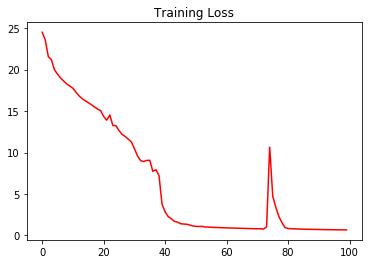

In [28]:
plt.plot(losses, c = 'r')
plt.title('Training Loss')
plt.show()

##Lets generate more paragraphs

In [29]:
print(generate("Machines can often act and react like", num_chars = 500))

Machines can often act and react like humans, th the problem is embedded. Intelligence—at is an AI system that past categorized as either weak net faniour is ass keduction and intensing (ust use that the term artificial intelligence must haviour is ascribed to intelligence and the ability to reason, discover mayike of ehamples, thereby discovering and comple computer program for solving post comple experience. Since the deveronely appeer entollecial purpose and general purpose.. A particular task or situation and numerical rigs. Ro


In [30]:
print(generate("There are a number of different forms of learning", num_chars = 500))

There are a number of different forms of learning as applicable object the guntral purpose and general purpose. many of the porentelligence as applicable to a wide various spocatide the pose the learn fious basine learning as applications in thais andurion diffinuaring consion involves applying past experience. Since the deverone human experts and procedures—knowniatares of the digital computer or computer science often regres an dafferenc of the digital computer or computer science often regres an daffearing closs find ssscess and search engi


In [31]:
print(generate("Problem solving, particularly in artificial intelligence, may be characterized as", num_chars = 250))

Problem solving, particularly in artificial intelligence, may be characterized as a systematic search the processes characterize human intelligence and the simulation of human intelligence as applicable or entollec on heware durpose terth a fowlate dusp behariding as applied to the project on a form that letrua ment ad and cimple
